# <div align="center">**Maternal Mortality Rates in the United States, 2019-2024**
---

## Introduction

#### Health disparities are intricately linked to social determinants of health. Factors such as socioeconomic status, race and ethnicity, access to healthcare, and education play a critical role in shaping the overall health outcomes in the United States [1]. It has been reported that Black Americans experience higher mortality rates than other racial and ethnic groups for numerous diseases and conditions including maternal mortality [1]. The U.S. has two to three times the maternal mortality rates of other high-income countries [2], making Black women disproportionally affected in the U.S. with mortality rates two times as high as white women [2].

#### For this project, a dataset [3] from the National Center for Health Statistics was used to visualizes data with four different types of charts. Demonstrated first is the process by which the dataset was cleaned, followed by the visualizations. 

1.	National Center for Health Statistics (US). *Health, United States, 2020-2021: Annual perspective*. National Center for Health Statistics; 2023. doi:10.15620/cdc:122044
2.	Gunja M, Tikkanen R, Zephyrin L, Schneider EC. *Insights into the US maternal mortality crisis: An international comparison*. Commonwealth Fund; 2024. doi:10.26099/cthn-st75
3.	Ahmad FB, Cisewski JA, Hoyert DL. *Provisional maternal mortality rates*. National Center for Health Statistics; 2025. doi:10.15620/cdc/202503050114
 -----

In [9]:
#import the original dataset for total population, age, and race and ethnicity 

import pandas as pd
from pathlib import Path

file_path = Path('mmr_proj.csv')

df = pd.read_csv(file_path)
df.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate,Footnote
0,07/06/2025,United States,Total,Total,2019,1,12 month-ending,01/31/2019,660,"3,787,776",17.4,NaN
1,07/06/2025,United States,Total,Total,2019,2,12 month-ending,02/28/2019,653,"3,783,489",17.3,NaN
2,07/06/2025,United States,Total,Total,2019,3,12 month-ending,03/31/2019,657,"3,771,682",17.4,NaN
3,07/06/2025,United States,Total,Total,2019,4,12 month-ending,04/30/2019,668,"3,772,235",17.7,NaN
4,07/06/2025,United States,Total,Total,2019,5,12 month-ending,05/31/2019,706,"3,767,999",18.7,NaN


Dataset: Provisional Maternal Death Counts and Rates (2019-2024) from the National Center for Health Statistics. https://data.cdc.gov/NCHS/VSRR-Provisional-Maternal-Death-Counts-and-Rates/e2d5-ggg7/about_data

In [11]:
#check the dataset for duplicates

df = df.drop_duplicates()
df.shape


(750, 12)

In [13]:
#delete columns that are not relevant

df = df.drop(columns=['Data As Of', 'Jurisdiction', 'Time Period', 'Month Ending Date', 'Footnote'])

df.head()

,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,Total,Total,2019,1,660,"3,787,776",17.4
1,Total,Total,2019,2,653,"3,783,489",17.3
2,Total,Total,2019,3,657,"3,771,682",17.4
3,Total,Total,2019,4,668,"3,772,235",17.7
4,Total,Total,2019,5,706,"3,767,999",18.7


In [15]:
#remove data from 2025 (only partial data is available for 2025)

remove_year = df[(df['Year of Death'] == 2025)].index
df.drop(remove_year, inplace=True)
df.head()


,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,Total,Total,2019,1,660,"3,787,776",17.4
1,Total,Total,2019,2,653,"3,783,489",17.3
2,Total,Total,2019,3,657,"3,771,682",17.4
3,Total,Total,2019,4,668,"3,772,235",17.7
4,Total,Total,2019,5,706,"3,767,999",18.7


In [17]:
#separate data by 'Group' for Total Population

df_total = df[df['Group'] == 'Total']
df_total.head()


,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,Total,Total,2019,1,660,"3,787,776",17.4
1,Total,Total,2019,2,653,"3,783,489",17.3
2,Total,Total,2019,3,657,"3,771,682",17.4
3,Total,Total,2019,4,668,"3,772,235",17.7
4,Total,Total,2019,5,706,"3,767,999",18.7


In [19]:
#check the number of rows

df_total.shape


(72, 7)

In [63]:
#remove missing data and check shape

#df_total = df_total.dropna()
#df_total.shape


In [65]:
#save the clean data as new file

df_total.to_csv("df_total_cln.csv")


In [21]:
#call the new clean data for Total Population

import pandas as pd
from pathlib import Path

file_path = Path('df_total_cln.csv')

df_total_cln = pd.read_csv(file_path)

df_total_cln.head()


,Unnamed: 0,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,0,Total,Total,2019,1,660,"3,787,776",17.4
1,1,Total,Total,2019,2,653,"3,783,489",17.3
2,2,Total,Total,2019,3,657,"3,771,682",17.4
3,3,Total,Total,2019,4,668,"3,772,235",17.7
4,4,Total,Total,2019,5,706,"3,767,999",18.7


In [23]:
#separate data by 'Group' for Age

df_age = df[df['Group'] == 'Age']
df_age.head()


,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
75,Age,Under 25 years,2019,1,98,"904,573",10.8
76,Age,Under 25 years,2019,2,103,"901,429",11.4
77,Age,Under 25 years,2019,3,101,"896,332",11.3
78,Age,Under 25 years,2019,4,107,"894,830",12.0
79,Age,Under 25 years,2019,5,113,"892,029",12.7


In [25]:
#check number of rows

df_age.shape


(216, 7)

In [73]:
#remove missing data and check shape

#df_age = df_age.dropna()

#df_age.shape


In [27]:
#save clean data as new file

df_age.to_csv("df_age_cln.csv")


In [29]:
#call the new clean data for Age Group

import pandas as pd
from pathlib import Path

file_path = Path('df_age_cln.csv')

df_age_cln = pd.read_csv(file_path)
df_age_cln.head()


,Unnamed: 0,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,75,Age,Under 25 years,2019,1,98,"904,573",10.8
1,76,Age,Under 25 years,2019,2,103,"901,429",11.4
2,77,Age,Under 25 years,2019,3,101,"896,332",11.3
3,78,Age,Under 25 years,2019,4,107,"894,830",12.0
4,79,Age,Under 25 years,2019,5,113,"892,029",12.7


In [31]:
#separate data by 'Group' for Race and Hispanic origin

df_race = df[df['Group'] == 'Race and Hispanic origin']
df_race.head()


,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
300,Race and Hispanic origin,Hispanic,2019,1,90,"885,705",10.2
301,Race and Hispanic origin,Hispanic,2019,2,90,"885,333",10.2
302,Race and Hispanic origin,Hispanic,2019,3,89,"883,687",10.1
303,Race and Hispanic origin,Hispanic,2019,4,96,"884,928",10.8
304,Race and Hispanic origin,Hispanic,2019,5,103,"884,930",11.6


In [33]:
#check the number of rows

df_race.shape


(432, 7)

In [83]:
#remove missing data and check shape

#df_race = df_race.dropna()
#df_race.shape


In [35]:
#save clean data as new file

df_race.to_csv("df_race_cln.csv")


In [37]:
# call the new clean data for Race and Hispanic Origin 

import pandas as pd
from pathlib import Path

file_path = Path('df_race_cln.csv')

df_race_cln = pd.read_csv(file_path)
df_race_cln.head()


,Unnamed: 0,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,300,Race and Hispanic origin,Hispanic,2019,1,90.0,"885,705",10.2
1,301,Race and Hispanic origin,Hispanic,2019,2,90.0,"885,333",10.2
2,302,Race and Hispanic origin,Hispanic,2019,3,89.0,"883,687",10.1
3,303,Race and Hispanic origin,Hispanic,2019,4,96.0,"884,928",10.8
4,304,Race and Hispanic origin,Hispanic,2019,5,103.0,"884,930",11.6


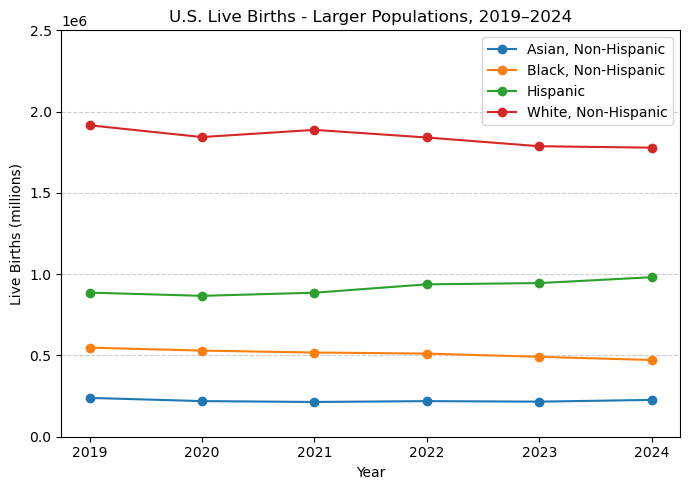

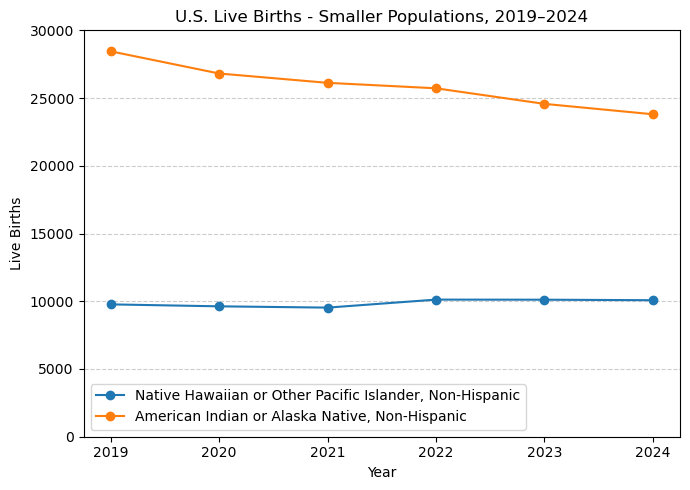

In [168]:
# create two line charts to compare the number of live births by Race and Hispanic Origin across all years

import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# December = 12-month ending total)
df_dec = df_race_cln[df_race_cln['Month of Death'] == 12].copy()

# Define large groups
large_groups = [
    "Asian, Non-Hispanic",
    "Black, Non-Hispanic",
    "Hispanic",
    "White, Non-Hispanic"]

plt.figure(figsize=(7,5))

for subgroup in large_groups:
    sub = df_dec[df_dec['Subgroup'] == subgroup]
    plt.plot(
        sub['Year of Death'],
        sub['Live Births'],
        marker='o',
        label=subgroup)

plt.title("U.S. Live Births - Larger Populations, 2019–2024")
plt.xlabel("Year")
plt.ylabel("Live Births (millions)")
plt.legend()
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.4)
plt.ylim(0, 2500000)  
plt.tight_layout()
plt.show()


# Define small groups
small_groups = [
    "Native Hawaiian or Other Pacific Islander, Non-Hispanic",
    "American Indian or Alaska Native, Non-Hispanic"]

plt.figure(figsize=(7,5))

for subgroup in small_groups:
    sub = df_dec[df_dec['Subgroup'] == subgroup]
    plt.plot(
        sub['Year of Death'],
        sub['Live Births'],
        marker='o',
        label=subgroup)

plt.title("U.S. Live Births - Smaller Populations, 2019–2024")
plt.xlabel("Year")
plt.ylabel("Live Births")
plt.legend()
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.4)
plt.ylim(0, 30000)  
plt.tight_layout()
plt.show()

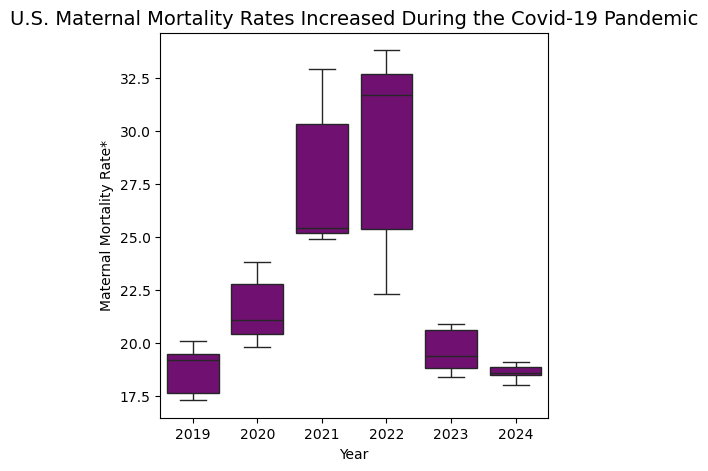

In [39]:
# create a boxplot to trend Maternal Mortality Rate by Year

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(5,5))                       

sns.boxplot(x = df_total_cln['Year of Death'], y = df_total_cln['Maternal Mortality Rate'], color = 'purple') 

plt.title('U.S. Maternal Mortality Rates Increased During the Covid-19 Pandemic', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Rate*')
plt.show() 


#### This boxplot shows that U.S. maternal mortality rates increased during the Covid-19 pandemic, peaked in 2021 and 2022, and returned to near baseline in 2024.  

##### *Maternal deaths per 100,000 live births

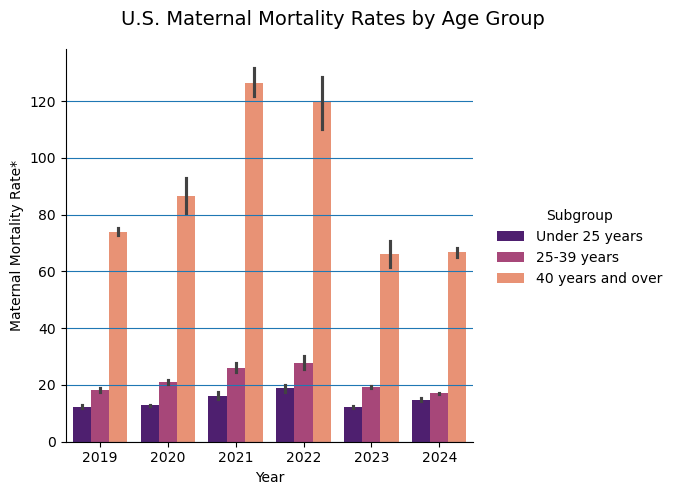

In [92]:
#create a grouped bar chart to compare maternal mortality rate by age

import seaborn as sns
from matplotlib import pyplot as plt

g = sns.catplot(data = df_age_cln, x = 'Year of Death', y = "Maternal Mortality Rate", hue = "Subgroup", kind = "bar", palette = 'magma')
g.fig.suptitle('U.S. Maternal Mortality Rates by Age Group', fontsize = 14)
g.map(plt.grid, axis = 'y')
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Rate*')
plt.show()


#### This grouped bar chart highlights how increased risk of maternal death is directly proportional to increased age. Maternal mortality rates are the lowest for women under age 25, slightly higher in women aged 25-39, and significantly greater in women aged 40 and over.  

##### *Maternal deaths per 100,000 live births

---
#### Live births across all races remain mostly stable throughout the COVID-19 pandemic with the exception of a near 15% decrease in the "American Indian or Alaska Native, Non-Hispanic" population. 
---

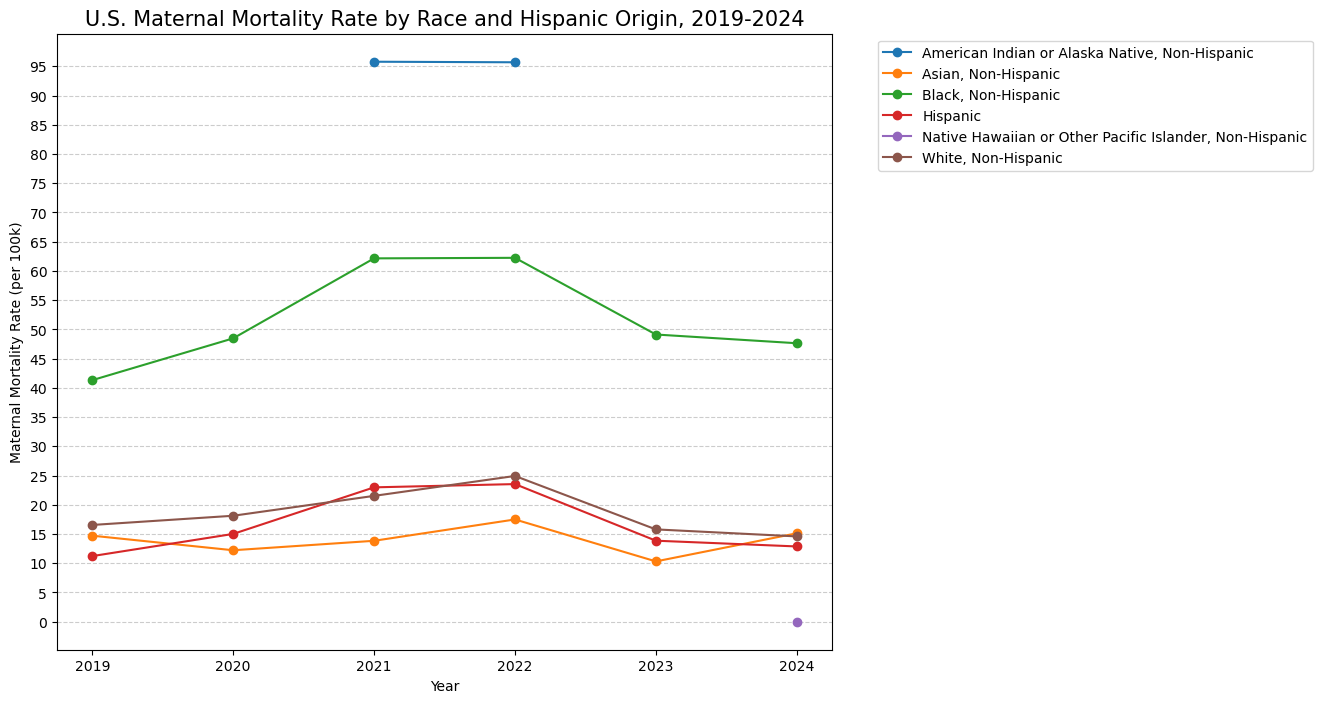

In [56]:
#create a line chart to compare the maternal mortality rate by Race and Hispanic Origin across all years

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline 

plt.figure(figsize = (10,8))
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Rate (per 100k)')
plt.title('U.S. Maternal Mortality Rate by Race and Hispanic Origin, 2019-2024', fontsize = 15)
plt.grid(axis = 'y', linestyle = '--', color = 'gray', alpha = 0.4)
plt.yticks(np.arange(0, 100, 5))

race_group = df_race_cln.groupby(['Year of Death', 'Subgroup'])['Maternal Mortality Rate'].mean().reset_index()

race_group['Year of Death'] = race_group['Year of Death'].astype(str)

for subgroup in race_group['Subgroup'].unique():
    subset = race_group.loc[race_group['Subgroup'] == subgroup]
    plt.plot(subset['Year of Death'], subset['Maternal Mortality Rate'], label = subgroup, marker = 'o')

plt.legend(loc="upper left", fontsize= 'small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### ---
#### The maternal mortality rate is more than double for Black mothers compared to Asian, Hispanic, and white mothers as discussed in the introduction. An unexpected result in this project is the mortality rate for American Indian or Alaka Native mothers which is nearly four times as high as that of Hispanic and white mothers and five to six times as high as for Aisan mothers. 

#### Note that per the original dataset "Rates for deaths counts <20 are unreliable" which is why there is only 2021-2022 data for the "American Indian or Alaska Native, Non-Hispanic" population and only 2024 data for the "Native Hawiian or Other Pacific Islander, Non-Hispanic" population.
---

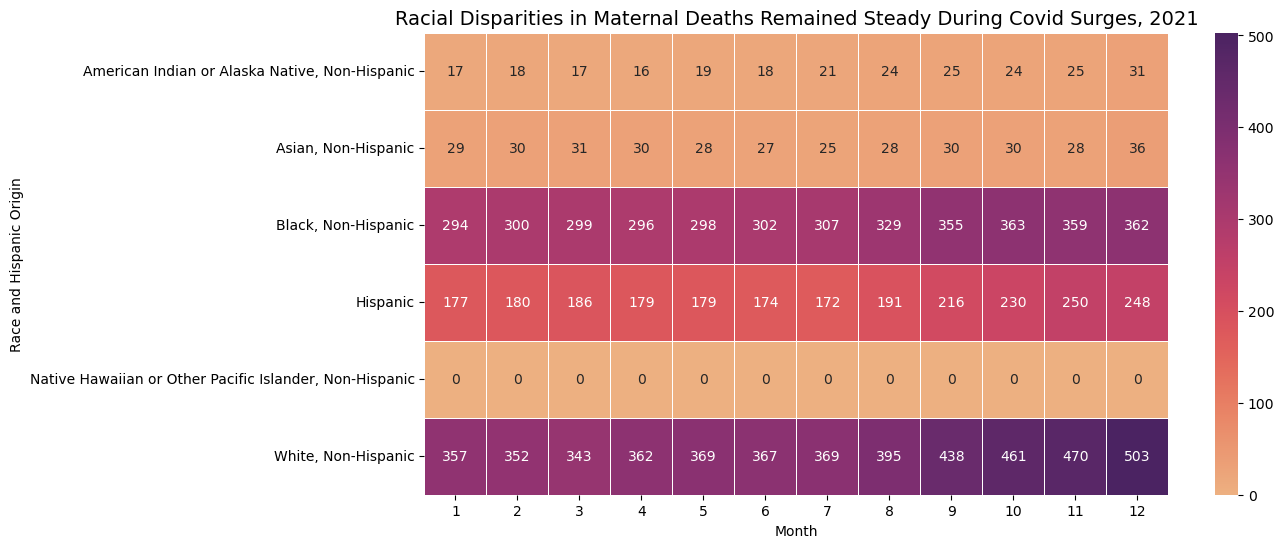

In [90]:
#create a heatmap of Maternal Deaths by Race and Month in 2021 to look for effects of COVID-19 surges

import seaborn as sns 
import matplotlib.pyplot as plt

race_month_data_2021 = df_race_cln[df_race_cln['Year of Death'] == 2021]
heatmap_data = race_month_data_2021.pivot_table(values = 'Maternal Deaths', 
                                                index = 'Subgroup', 
                                                columns = 'Month of Death', 
                                                aggfunc = 'sum')

plt.figure(figsize = (12, 6))
sns.heatmap(heatmap_data, annot = True, fmt = 'g', cmap = 'flare', linewidth = 0.5)
plt.title('Racial Disparities in Maternal Deaths Remained Steady During Covid Surges, 2021', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Race and Hispanic Origin')
plt.show()


#### The number of deaths for Black, Hispanic, and White mothers increased in the second half of 2021. This heat map demonstrates the effect of two Covid surges in the second half of 2021, the Delta variant in July and the Omicron variant in November [3].

3. Katella K. Omicron, Delta, Alpha, and More: What To Know About the Coronavirus Variants. September 1, 2023. Accessed December 9, 2024. https://www.yalemedicine.org/news/covid-19-variants-of-concern-omicron

---
#### In conclusion this data reveals that from 2019-2024 live births were stable for all race and ethnicity groups with the expeption of American Indian and Alaska Native populations; the maternal mortality rate for all populations significantly increased; women over 40 had higher mortality rates compared to younger women; American Indian and Alaskan Native and Black mothers suffered from signfincantly greater mortality rates compared to Asian, Hispanic, and white mothers; and mortality rates for all race and ethnicity groups increased during the Delta and Omicron variant surges in 2021.
---